# 5002 Project

## Task 1: Average Travel Time Estimation

In [1]:
import feature
import model
import matplotlib.pyplot as plt
import utils

In [2]:
dataset_train, dataset_test = feature.load()

In [3]:
lgbm = model.LGBM(lr=1e-2, boosting_type='gbdt', obj='regression', metric='rmse', bagging_freq=1, bagging_fraction=0.8, feature_fraction=0.4)

In [7]:
lgbm.train(dataset_train, val_proportion=0.2, max_round=300)

number of training data = 19832
number of validation data = 4955
round: 20/300
round: 40/300
round: 60/300
round: 80/300
round: 100/300
round: 120/300
round: 140/300
round: 160/300
round: 180/300
round: 200/300
round: 220/300
round: 240/300
round: 260/300
round: 280/300
round: 300/300


lowest MAPE = 0.25506592062526284
best_boost_round = 300


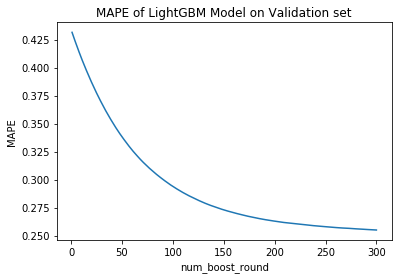

In [8]:
print("lowest MAPE = %s" % lgbm.lowest_MAPE_)
print("best_boost_round = %s" % lgbm.best_boost_round_)

plt.title("MAPE of LightGBM Model on Validation set")
plt.xlabel("num_boost_round")
plt.ylabel("MAPE")
plt.plot(range(1,301), lgbm.MAPE_history_)
plt.show()

In [9]:
# Generate submittion.csv
pred_time = lgbm.predict(dataset_test)
utils.get_submission("lgbm_submission.csv", pred_time)

In [4]:
rf = model.RandomForestRegression()
rf.train(dataset_train, val_proportion=0.2, max_n_estimators=20)

number of training data = 19824
number of validation data = 4963
n_estimators: 2/20
n_estimators: 4/20
n_estimators: 6/20
n_estimators: 8/20
n_estimators: 10/20
n_estimators: 12/20
n_estimators: 14/20
n_estimators: 16/20
n_estimators: 18/20
n_estimators: 20/20


lowest MAPE = 0.25218572858346583
best_n_estimators = 19


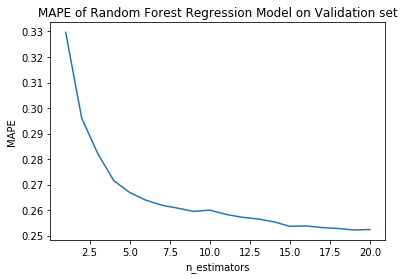

In [5]:
print("lowest MAPE = %s" % rf.lowest_MAPE_)
print("best_n_estimators = %s" % rf.best_n_estimators_)

plt.title("MAPE of Random Forest Regression Model on Validation set")
plt.xlabel("n_estimators")
plt.ylabel("MAPE")
plt.plot(range(1,21), rf.MAPE_history_)
plt.show()

In [6]:
# Generate submittion.csv
pred_time = rf.predict(dataset_test)
utils.get_submission("rf_submission.csv", pred_time)

In [10]:
import torch
torch.cuda.is_available()

True

In [11]:
device = torch.device('cuda')

number of training data = 19832
number of validation data = 4955
iteration: 0/500
iteration: 100/500
iteration: 200/500
iteration: 300/500
iteration: 400/500
lowest MAPE = 0.25424017508824664


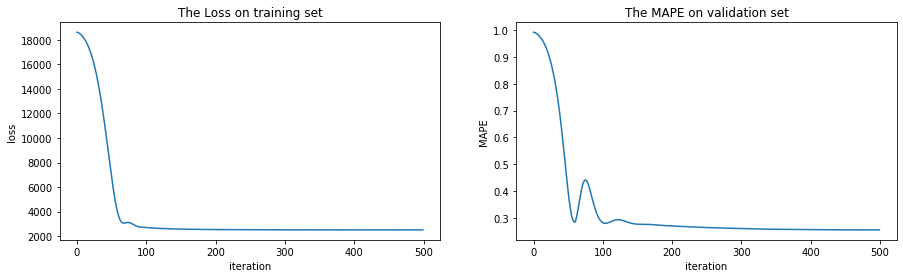

In [12]:
# Initialize Neural Network
fnn = model.FNN(D_in=121, H1=5, H2=3, D_out=1, iteration=500, lr=1e-2, device=device)
# Train network
fnn.train(dataset_train, val_proportion=0.2)

# Print lowest MAPE
print("lowest MAPE = %s" % fnn.lowest_MAPE_)

# Plot the loss curve and MAPE on validation set
fnn.visualize()

In [13]:
pred_time = fnn.predict(dataset_test).cpu().detach().numpy()
utils.get_submission("fnn_submission.csv", pred_time)

number of training data = 22307
number of validation data = 2480
iteration: 0/500
iteration: 100/500
iteration: 200/500
iteration: 300/500
iteration: 400/500
lowest MAPE = 0.21040287017822265


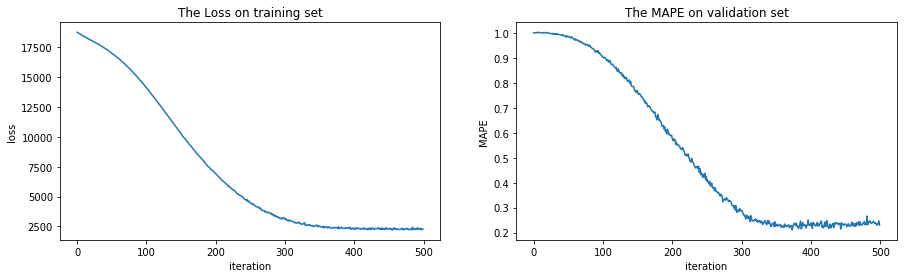

In [14]:
# Initialize Neural Network
nn = model.NN(D_in=121, H=64, D_out=1, iteration=500, lr=8e-4, device=device)
# Train network
nn.train(dataset_train, val_proportion=0.1)

# Print lowest MAPE
print("lowest MAPE = %s" % nn.lowest_MAPE_)

# Plot the loss curve and MAPE on validation set
nn.visualize()

In [11]:
pred_time = nn.predict(dataset_test).cpu().detach().numpy()
utils.get_submission("nn_submission.csv", pred_time)

array([[ 89.58833 ],
       [ 96.17356 ],
       [ 97.24072 ],
       [ 96.04291 ],
       [ 92.37754 ],
       [101.725075],
       [104.54701 ],
       [101.3103  ],
       [106.67899 ],
       [109.65658 ],
       [ 96.490486],
       [119.95523 ],
       [ 93.922516],
       [ 95.94336 ],
       [102.98191 ],
       [ 93.64303 ],
       [109.94311 ],
       [101.10563 ],
       [123.567535],
       [117.16328 ],
       [118.58721 ],
       [107.99724 ],
       [121.919106],
       [ 82.54756 ],
       [100.26601 ],
       [102.85318 ],
       [106.67003 ],
       [111.1555  ],
       [111.70858 ],
       [118.86306 ],
       [109.85925 ],
       [112.96731 ],
       [115.008606],
       [129.48492 ],
       [ 95.006615],
       [ 93.41229 ],
       [102.08253 ],
       [ 93.69539 ],
       [106.25841 ],
       [ 98.75116 ],
       [117.031654],
       [109.74324 ],
       [119.633736],
       [ 99.46307 ],
       [120.84568 ],
       [ 92.75922 ],
       [101.19749 ],
       [ 97.5